# РЕТ-проект "Определение жанра по изображению обложки музыкального диска".

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#!ls '/content/drive/MyDrive/Data'

# Часть II. Transfer-Learning.

<div align="center"><font size="4"><b>Внутренний проект Яндекс Мастерская.</b></font><br>

<div align="right"><font size="4">DimaDoesCode</font><br>
<font size="3">April 17th, 2024</font></div>

<h1>Содержание.<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Постановка-задачи." data-toc-modified-id="Постановка-задачи.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Постановка задачи.</a></span></li><li><span><a href="#Предлагаемый-подход-к-решению." data-toc-modified-id="Предлагаемый-подход-к-решению.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предлагаемый подход к решению.</a></span></li><li><span><a href="#Настройка-проекта." data-toc-modified-id="Настройка-проекта.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Настройка проекта.</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек,-модулей,-классов-и-функций." data-toc-modified-id="Импорт-библиотек,-модулей,-классов-и-функций.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Импорт библиотек, модулей, классов и функций.</a></span></li><li><span><a href="#Настройка-окружения-и-глобальные-переменные." data-toc-modified-id="Настройка-окружения-и-глобальные-переменные.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Настройка окружения и глобальные переменные.</a></span><ul class="toc-item"><li><span><a href="#Пользовательские-переменные." data-toc-modified-id="Пользовательские-переменные.-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Пользовательские переменные.</a></span></li><li><span><a href="#Системные-переменные." data-toc-modified-id="Системные-переменные.-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Системные переменные.</a></span></li><li><span><a href="#Настройка-окружения." data-toc-modified-id="Настройка-окружения.-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Настройка окружения.</a></span></li></ul></li><li><span><a href="#Пользовательские-функции." data-toc-modified-id="Пользовательские-функции.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Пользовательские функции.</a></span><ul class="toc-item"><li><span><a href="#Функции." data-toc-modified-id="Функции.-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Функции.</a></span><ul class="toc-item"><li><span><a href="#Отображение-изображений." data-toc-modified-id="Отображение-изображений.-3.3.1.1"><span class="toc-item-num">3.3.1.1&nbsp;&nbsp;</span>Отображение изображений.</a></span></li><li><span><a href="#Визуализация-матрицы-ошибок." data-toc-modified-id="Визуализация-матрицы-ошибок.-3.3.1.2"><span class="toc-item-num">3.3.1.2&nbsp;&nbsp;</span>Визуализация матрицы ошибок.</a></span></li><li><span><a href="#Визуализация-эмбеддингов." data-toc-modified-id="Визуализация-эмбеддингов.-3.3.1.3"><span class="toc-item-num">3.3.1.3&nbsp;&nbsp;</span>Визуализация эмбеддингов.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#DataFrame-соответствий." data-toc-modified-id="DataFrame-соответствий.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>DataFrame соответствий.</a></span><ul class="toc-item"><li><span><a href="#Визуализация." data-toc-modified-id="Визуализация.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Визуализация.</a></span></li></ul></li><li><span><a href="#Подготовка-данных." data-toc-modified-id="Подготовка-данных.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подготовка данных.</a></span><ul class="toc-item"><li><span><a href="#Разбиение-данных-на-обучающую-и-тестовую-выборки." data-toc-modified-id="Разбиение-данных-на-обучающую-и-тестовую-выборки.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Разбиение данных на обучающую и тестовую выборки.</a></span></li><li><span><a href="#Загрузчик-данных." data-toc-modified-id="Загрузчик-данных.-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Загрузчик данных.</a></span></li></ul></li><li><span><a href="#Transfer-Learning-модели." data-toc-modified-id="Transfer-Learning-модели.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Transfer-Learning модели.</a></span><ul class="toc-item"><li><span><a href="#Дообучение-модели." data-toc-modified-id="Дообучение-модели.-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Дообучение модели.</a></span></li><li><span><a href="#Результаты-дообучения-модели." data-toc-modified-id="Результаты-дообучения-модели.-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Результаты дообучения модели.</a></span><ul class="toc-item"><li><span><a href="#Визуальные-результаты-на-обучающей-выборке." data-toc-modified-id="Визуальные-результаты-на-обучающей-выборке.-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Визуальные результаты на обучающей выборке.</a></span></li><li><span><a href="#Количественные-результаты-на-тестовой-выборке." data-toc-modified-id="Количественные-результаты-на-тестовой-выборке.-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Количественные результаты на тестовой выборке.</a></span></li></ul></li><li><span><a href="#Кластеризация-эмбедингов." data-toc-modified-id="Кластеризация-эмбедингов.-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Кластеризация эмбедингов.</a></span></li></ul></li><li><span><a href="#Общий-вывод-и-дальнейшие-шаги." data-toc-modified-id="Общий-вывод-и-дальнейшие-шаги.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод и дальнейшие шаги.</a></span></li></ul></div>

## Постановка задачи.



<img src="https://s3.amazonaws.com/thumbnails.illustrationsource.com/huge.103.515175.JPG" width="100" align="left"/>
<font size="4"><b>Заказчик.</b></font></br></br>
Внутренний проект Яндекс Мастерская.</br>

<font size="4"><b>Описание проекта.</b></font></br></br>
<b>Цель:</b>
- Очевидно, что оформление музыкального альбома как-то связано с его содержанием. Но насколько связано? Как подтвердить это, опираясь на данные? И чем это может быть полезно?

<b>Задачи:</b>
- Необходимо разработать модель, которая определит жанр музыкального альбома по изображению его обложки.

<b>Задачи опционально:</b>
- Кластеризация: исследовать, какие жанры лучше выделяются на фоне других, а какие – трудноразделимы;
- API MusicBrainz: расширение датасета новыми изображениями. Можно расширить список жанров и использовать обратную сторону обложки;
- OCR + NLP: извлечь текст из изображения и обогатить решение применением NLP;
- Создать рекомендательную систему в миниатюре, опираясь на изображения;
- Streamlit оформить классификатор жанров или рекомендательную систему в виде веб-приложения.

<font size="4"><b>Используемый стек технологий.</b></font></br>
- Библиотеки для ML: python, sklearn, faiss, pytorch, torchvision, fastai

<font size="4"><b>Результат.</b></font></br>
- Тетрадь с решением задачи;
- Если решение состоит из нескольких частей — репозиторий на GitHub;
- Если сделано веб-приложение — репозиторий на GitHub и ссылка на приложение.



<font size="4"><b>Описание данных.</b></font></br></br>
Изображения в формате PNG, упакованные в zip-архивы. Имя архива соответствует музыкальному жанру. Каждый zip-архив содержит папку с изображениями музыкальных обложек соответствующего жанра.

## Предлагаемый подход к решению.

<b>Общий подход к решению</b>

2. <b>Подготовка данных</b>: Этот этап включает в себя загрузку и предварительную обработку данных. Важно проанализировать данные, выполнить необходимую очистку и преобразование, чтобы они были готовы к использованию моделями машинного обучения.

3. <b>Выбор модели</b>: На этом этапе выбираются подходящие модели машинного обучения для решения задачи. Это может включать в себя использование предварительно обученных моделей с передачей обучения или создание собственных моделей с нуля.

4. <b>Обучение модели</b>: После выбора модели проводится процесс обучения на подготовленных данных. Здесь важно подобрать подходящие гиперпараметры и использовать правильные методы оценки модели.

5. <b>Оценка результатов</b>: После обучения модели производится оценка ее производительности с использованием различных метрик качества. Это помогает понять, насколько хорошо модель справляется с поставленной задачей.

<b><i>Disclaimer:</i></b>

<i>Результаты, представленные в данном проекте, могут незначительно расходиться от запуска к запуску. Автор проекта признает, что не обладает полной ясностью по поводу причин этих незначительных различий и оставляет этот факт без изменений.</i>

<i>Помимо этого, автор отмечает, что различия в результатах могут быть вызваны различными факторами, включая, но не ограничиваясь, особенностями алгоритмов и параметрами, использованными в рамках проекта, а также неконтролируемыми переменными, связанными с окружением выполнения кода и другими факторами.</i>

<i>Несмотря на незначительные различия в результатах, автор считает, что представленные в проекте выводы остаются ценными и полезными для понимания исследуемой проблематики.</i>

## Настройка проекта.

### Импорт библиотек, модулей, классов и функций.

In [5]:
import os
import random
import time
from typing import Any, Dict, List
import warnings

from collections import defaultdict
import torch
from fastai.callback.tracker import EarlyStoppingCallback
from fastai.vision.all import *

import matplotlib.pyplot as plt
from matplotlib import rcParams, rcParamsDefault

import numpy as np
import pandas as pd

from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, f1_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import NearestNeighbors

### Настройка окружения и глобальные переменные.

#### Пользовательские переменные.

In [6]:
EPOCHS: int = 30
MUSIC_FOLDER_PATH: str = r'C:\Users\dmitr\DS_Yandex_Workshop\Predicting Music Genre Based on the Album Cover\Data'
#MUSIC_FOLDER_PATH: str = '/content/drive/MyDrive/Data'
MAKE_EMBEDDINGS: bool = False
TITLE_FONTSIZE: int = 10
TRANSFER_LEARNING: bool = False
MUSIC_DF_FILE: str = 'music_df_unique.csv'
#MUSIC_DF_FILE: str = '/content/drive/MyDrive/Colab Notebooks/music_df_unique_gpu.csv'

#### Системные переменные.

In [7]:
FACTOR: int = 1
RANDOM_STATE: int = 42

#### Настройка окружения.

In [8]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

default_dpi = rcParamsDefault['figure.dpi']
rcParams['figure.dpi'] = (default_dpi * FACTOR)
rcParams['figure.figsize'] = 7, 4

pd.options.display.float_format = '{:,.4f}'.format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

#torch.manual_seed(RANDOM_STATE)
#if torch.cuda.is_available():
#    torch.cuda.manual_seed_all(RANDOM_STATE)

### Пользовательские функции.

#### Функции.

##### Отображение изображений.

In [9]:
def my_display_images_from_dataframe(dataframe: pd.DataFrame, images_per_row: int = 3, num_rows: int = 3) -> None:
    """
    Display images from a dataframe as a grid.

    Args:
        dataframe (pd.DataFrame): DataFrame with information about the images.
        images_per_row (int, optional): Number of images per row in the grid. Defaults to 5.
        num_rows (int, optional): Number of rows in the grid. Defaults to 3.
    """

    # Create a new figure with the specified size
    fig: plt.Figure = plt.figure(figsize=(10, 10))

    # Iterate over each image in the dataframe, limiting the total number of images to display
    for i, image_filename in enumerate(dataframe['full_file_name'][:images_per_row * num_rows], start=1):

        if not os.path.exists(image_filename):
            print(f'File not found: {image_filename}')
            continue

        genre: str = dataframe[dataframe['full_file_name'] == image_filename]['genre'].values[0]
        img: Image.Image = Image.open(image_filename)

        ax: plt.Axes = fig.add_subplot(num_rows, images_per_row, i)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f'Image #{i}\nGenre: {genre}', fontsize=TITLE_FONTSIZE)

    # Adjust the layout of the subplots to fit nicely
    plt.tight_layout()

    # Show the plot
    plt.show()

    return

##### Визуализация матрицы ошибок.

In [10]:
def my_plot_confusion_matrix(true_labels: list[str], predicted_labels: list[str], labels: list[str]) -> None:
    """
    Plot the confusion matrix.

    Args:
        true_labels (List[str]): List of true labels.
        predicted_labels (List[str]): List of predicted labels.
        labels (List[str]): List of all classes (labels).
    """

    # Compute the normalized confusion matrix
    cm: np.ndarray = confusion_matrix(true_labels, predicted_labels, labels=labels, normalize=True)
    cm = np.round(cm, 1)

    # Create ConfusionMatrixDisplay object
    display: Any = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

    # Plot the confusion matrix
    plt.figure(figsize=(14, 12))
    display.plot(cmap='Blues', xticks_rotation='vertical')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Genre Classification Confusion Matrix', pad=20)

    plt.show()

    return

In [11]:
def my_plot_confusion_matrix_v2(true_labels: list[str],
                                predicted_labels: list[str],
                                labels: list[str],
                                title: str,
                                ax=None) -> None:
    """
    Plot the confusion matrix.

    Args:
        true_labels (List[str]): List of true labels.
        predicted_labels (List[str]): List of predicted labels.
        labels (List[str]): List of all classes (labels).
        title (str): Title for the confusion matrix plot.
        ax: Axes object for subplot. If None, a new subplot will be created.
    """

    # Compute the normalized confusion matrix
    cm: np.ndarray = confusion_matrix(true_labels, predicted_labels, labels=labels)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = np.round(cm, 1)

    # Create ConfusionMatrixDisplay object
    display: Any = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

    # Plot the confusion matrix on the specified Axes or a new subplot
    if ax is None:
        plt.figure(figsize=(6, 5))
        ax = plt.gca()

    display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title, pad=20)

##### Визуализация эмбеддингов.

In [12]:
def my_plot_embedding(embeddings: np.ndarray, labels: pd.Series, title: str) -> None:
    """
    Plot embeddings with TSNE.

    Args:
        embeddings: The embeddings to plot.
        labels: Labels for the embeddings.
        title: Title for the plot.
    """

    # Initialize TSNE
    tsne = TSNE(n_components=2, random_state=RANDOM_STATE)

    # Transform embeddings to 2D
    embeddings_2d: np.ndarray = tsne.fit_transform(embeddings)

    # Plot embeddings
    plt.figure(figsize=(10, 8))
    for i, label in enumerate(set(labels)):
        indices = labels == label
        plt.scatter(embeddings_2d[indices, 0], embeddings_2d[indices, 1], label=label)
    plt.title(title)
    plt.legend()
    plt.show()

    return

## DataFrame соответствий.

Для более эффективной работы предлагается использовать датафрейм, включающий основные метаданные изображений, такие как жанр, полное имя файла, комбинированный индекс и другие данные, полученные в первой части проекта. Давайте вернемся к его основному содержанию.

In [13]:
music_df_unique: pd.DataFrame = pd.read_csv(MUSIC_DF_FILE)
music_df_unique.head()

,genre,file_name,index,full_file_name
0,anime,00095702-6b86-4bb1-880e-1e09e759a013.png,anime:00095702-6b86-4bb1-880e-1e09e759a013.png,C:\Users\dmitr\DS_Yandex_Workshop\Predicting Music Genre Based on the Album Cover\Data\anime\00095702-6b86-4bb1-880e-1e09e759a013.png
1,anime,0091bee3-a67a-457e-8c5f-b4a1055b1211.png,anime:0091bee3-a67a-457e-8c5f-b4a1055b1211.png,C:\Users\dmitr\DS_Yandex_Workshop\Predicting Music Genre Based on the Album Cover\Data\anime\0091bee3-a67a-457e-8c5f-b4a1055b1211.png
2,anime,00a9d688-337f-4807-83cd-596540f1683b.png,anime:00a9d688-337f-4807-83cd-596540f1683b.png,C:\Users\dmitr\DS_Yandex_Workshop\Predicting Music Genre Based on the Album Cover\Data\anime\00a9d688-337f-4807-83cd-596540f1683b.png
3,anime,00ddb3de-75db-4e27-ad3d-441a5dc95636.png,anime:00ddb3de-75db-4e27-ad3d-441a5dc95636.png,C:\Users\dmitr\DS_Yandex_Workshop\Predicting Music Genre Based on the Album Cover\Data\anime\00ddb3de-75db-4e27-ad3d-441a5dc95636.png
4,anime,00ec64ef-c6ab-4a63-91df-59ce8db4ea25.png,anime:00ec64ef-c6ab-4a63-91df-59ce8db4ea25.png,C:\Users\dmitr\DS_Yandex_Workshop\Predicting Music Genre Based on the Album Cover\Data\anime\00ec64ef-c6ab-4a63-91df-59ce8db4ea25.png


### Визуализация.

Простая визуализация 12 изображений, выбранных случайным образом, наглядно демонстрирует несколько основных жанров. Видно, что художественное оформление альбомов в значительной степени зависит от жанра, и, вероятно, может быть успешно классифицировано высокоуровневыми слоями сверточных нейронных сетей.

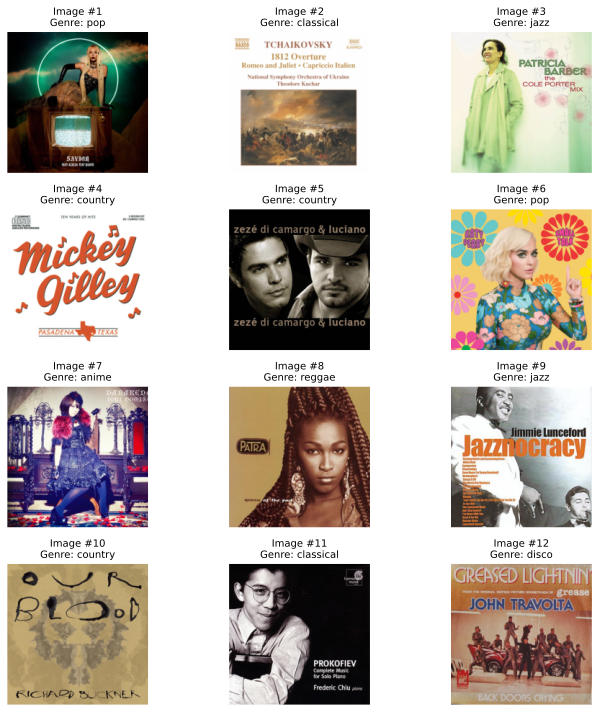

In [14]:
my_display_images_from_dataframe(
    music_df_unique.sample(12, random_state=RANDOM_STATE),
    images_per_row=3,
    num_rows=4
)

## Подготовка данных.

Подготовка данных будет состоять из двух небольших этапов. Сначала мы проведем стратифицированное разбиение данных на обучающую и тестовую выборки, учитывая дисбаланс классов, а затем создадим соответствующий загрузчик данных для обучения модели.

### Разбиение данных на обучающую и тестовую выборки.

По результатам экспериментов StratifiedShuffleSplit показал более эффективные результаты на наших данных, поэтому мы сразу применим его для разделения выборки.

In [15]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=RANDOM_STATE)

for train_index, test_index in sss.split(music_df_unique, music_df_unique['genre']):
    music_df_train = music_df_unique.iloc[train_index]
    music_df_test = music_df_unique.iloc[test_index]

In [16]:
train_indices: list[int] = music_df_train.index.to_list()
train_indices_length: int = len(train_indices)
print(f'Number of "train" indices: {train_indices_length}')

Number of "train" indices: 6159


In [17]:
test_indices: list[int] = music_df_test.index.to_list()
test_indices_length: int = len(test_indices)
print(f'Number of "test" indices: {test_indices_length}')

Number of "test" indices: 1540


In [18]:
split_percentage: float = test_indices_length / (train_indices_length + test_indices_length)
print(f'Split percentage: {split_percentage:.2%}')

Split percentage: 20.00%


### Загрузчик данных.

Создадим простой загрузчик данных библиотеки fastai, который будет взаимодействовать непосредственно с нашим датафреймом. Затем мы проверим его работу, загрузив несколько изображений.

In [19]:
genres: Any = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=ColReader('full_file_name'),
    get_y=ColReader('genre'),
    splitter=RandomSplitter(),
    item_tfms=Resize(224)
)

In [20]:
loader: Any = genres.dataloaders(music_df_train)

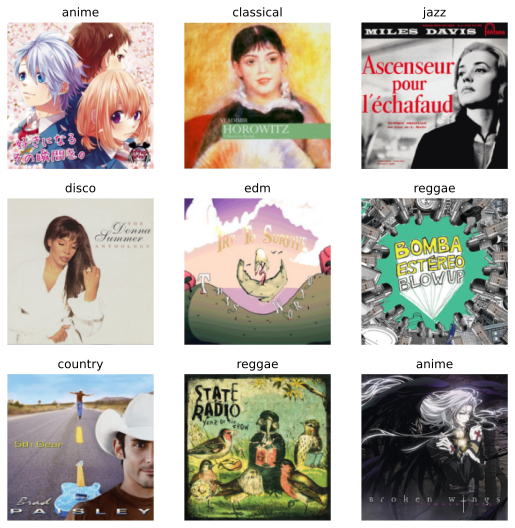

In [21]:
loader.show_batch(max_n=9)

## Transfer-Learning модели.

Transfer-Learning модели создаются довольно просто с использованием библиотеки fastai. Поэтому сначала мы определим оптимальный learning rate, предлагаемый fastai, затем дообучим модель с использованием близкого к нему learning rate. Далее мы просто сравним результаты работы дообученной модели с базовой моделью из первой части проекта.

### Дообучение модели.

In [22]:
learn: Any = vision_learner(loader, resnet50, metrics=accuracy, pretrained=True)

CPU times: total: 1h 21min 56s
Wall time: 41min 28s


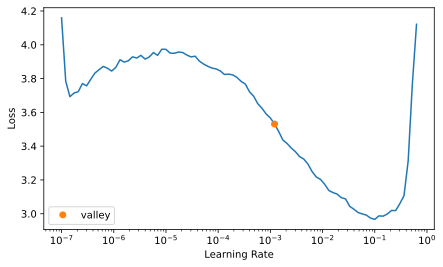

In [23]:
%%time
if os.path.exists('models\\learn_resnet50.pth') and not TRANSFER_LEARNING:
    print('learn.lr_find() skipped')
else:
    learn.lr_find()

Нам предлагается использовать learning rate около 10e-3. Давайте возьмем, например, 3e-3, и дообучим модель на 30 эпохах, используя EarlyStoppingCallback, чтобы не терять время напрасно.

In [24]:
%%time
if os.path.exists('models\\learn_resnet50.pth') and not TRANSFER_LEARNING:
    learn: Any = learn.load('learn_resnet50')
    print('learn_resnet50 loaded from disk')
else:
    early_stop_cb: Any = EarlyStoppingCallback(monitor='accuracy', min_delta=0, patience=3)
    learn.fine_tune(EPOCHS, 3e-3, cbs=early_stop_cb)
    learn.save('learn_resnet50')
    print('learn_resnet50 saved to disk')

epoch,train_loss,valid_loss,accuracy,time
0,2.167831,1.671647,0.538586,38:28


epoch,train_loss,valid_loss,accuracy,time
0,1.040263,1.256895,0.612510,48:24
1,0.615240,1.241900,0.629569,48:33
2,0.376907,1.265549,0.632007,48:50
3,0.238524,1.345437,0.626320,48:58
4,0.157842,1.390309,0.648253,49:07
5,0.117733,1.580289,0.640130,49:18
6,0.142857,1.761370,0.623883,49:19
7,0.164951,1.792245,0.628757,49:26


No improvement since epoch 4: early stopping
learn_resnet50 saved to disk
CPU times: total: 14h 15min 51s
Wall time: 7h 10min 28s


### Результаты дообучения модели.

Поскольку мы работаем с изображениями, мы можем не только оценить графики и метрики, но и визуализировать сами изображения с результатами анализа. Давайте начнем с визуализации, а затем рассмотрим полученные метрики и графики.

#### Визуальные результаты на обучающей выборке.

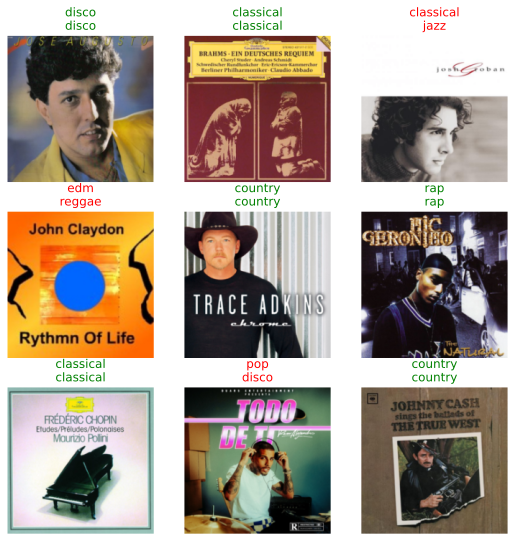

In [25]:
learn.show_results()

Ну что ж, как говорится, не ошибается тот, кто ничего не делает. Хотя, честно говоря, даже люди, не знакомые с предметной областью, могут испытывать затруднения в различиях. Давайте посмотрим на топ 9 ошибок.

In [26]:
interp: Any = Interpretation.from_learner(learn)

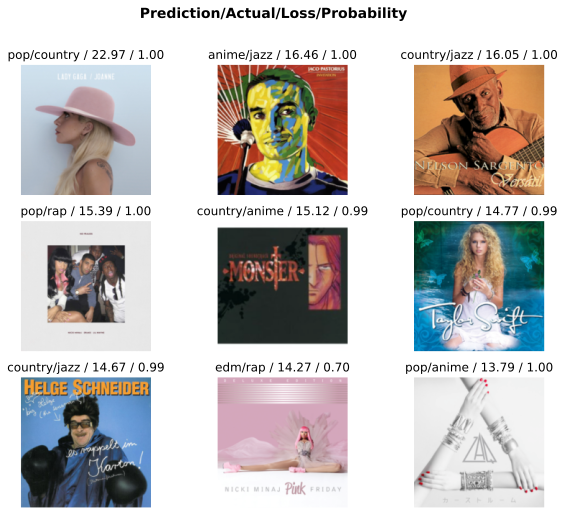

In [27]:
interp.plot_top_losses(9, figsize=(10,8))

Грубые ошибки некоторые могут быть очевидными, в то время как другие можно было бы объяснить характером модели. Конечно, оценить жанр альбома по одной лишь обложке недостаточно; нужны дополнительные данные, такие как список названий песен, лейбл звукозаписывающей компании и прочее.

#### Количественные результаты на тестовой выборке.

Пришло время получить численные результаты работы модели на тестовой выборке. Мы сделаем предсказания и проведем их количественный анализ. Возможно, существует более простой способ получить предсказания, но мы выберем именно тот, который приведен ниже.

In [28]:
%%time
test_dl: Any = learn.dls.test_dl(music_df_test['full_file_name'])
preds, _ = learn.get_preds(dl=test_dl)

CPU times: total: 8min 58s
Wall time: 4min 36s


In [29]:
pred_classes: torch.Tensor = preds.argmax(dim=1)
pred_probs: torch.Tensor = preds.softmax(dim=1)

In [30]:
music_df_pred = pd.DataFrame()
music_df_pred['predicted_class'] = pred_classes
music_df_pred['predicted_probabilities'] = pred_probs.tolist()

In [31]:
dls: Any = learn.dls
class_labels: list = dls.vocab
class_mapping = {i: class_labels[i] for i in range(len(class_labels))}
music_df_pred['class_names'] = music_df_pred['predicted_class'].map(class_mapping)

Предварительный анализ полученных данных показывает, что наша инициатива была успешной.

In [32]:
music_df_pred.head()

,predicted_class,predicted_probabilities,class_names
0,5,"[0.08560891449451447, 0.0854158028960228, 0.08538510650396347, 0.08538495749235153, 0.08538499474525452, 0.2312050312757492, 0.08538495749235153, 0.08545631915330887, 0.08538591861724854, 0.0853879451751709]",edm
1,6,"[0.08567965030670166, 0.08567535877227783, 0.08568109571933746, 0.08569193631410599, 0.0879376009106636, 0.08571233600378036, 0.22651487588882446, 0.08573924750089645, 0.08569201827049255, 0.08567588776350021]",jazz
2,6,"[0.08570944517850876, 0.08571410179138184, 0.0878431424498558, 0.08581957966089249, 0.08578166365623474, 0.0857098251581192, 0.22597023844718933, 0.08570963144302368, 0.08570952713489532, 0.08603280037641525]",jazz
3,9,"[0.08618243783712387, 0.08629167824983597, 0.08618026971817017, 0.08646862208843231, 0.08618378639221191, 0.08618097752332687, 0.08618034422397614, 0.09204351156949997, 0.08631186932325363, 0.21797646582126617]",reggae
4,3,"[0.08770498633384705, 0.08573796600103378, 0.08564945310354233, 0.22694696485996246, 0.08564947545528412, 0.08568521589040756, 0.08565041422843933, 0.08567459881305695, 0.08564989268779755, 0.08565101027488708]",country


In [33]:
music_df_test.head()

,genre,file_name,index,full_file_name
4652,edm,307101e7-6bb7-4f3b-a3ff-4bc57df55d95.png,edm:307101e7-6bb7-4f3b-a3ff-4bc57df55d95.png,C:\Users\dmitr\DS_Yandex_Workshop\Predicting Music Genre Based on the Album Cover\Data\edm\307101e7-6bb7-4f3b-a3ff-4bc57df55d95.png
5507,jazz,51258fa4-29c5-4b86-bfda-b630573ec222.png,jazz:51258fa4-29c5-4b86-bfda-b630573ec222.png,C:\Users\dmitr\DS_Yandex_Workshop\Predicting Music Genre Based on the Album Cover\Data\jazz\51258fa4-29c5-4b86-bfda-b630573ec222.png
2457,classical,e2f49f25-a3ca-4177-99b8-55506b25b8f5.png,classical:e2f49f25-a3ca-4177-99b8-55506b25b8f5.png,C:\Users\dmitr\DS_Yandex_Workshop\Predicting Music Genre Based on the Album Cover\Data\classical\e2f49f25-a3ca-4177-99b8-55506b25b8f5.png
5339,jazz,263632c5-949e-4e7a-a2fe-66704edb3b01.png,jazz:263632c5-949e-4e7a-a2fe-66704edb3b01.png,C:\Users\dmitr\DS_Yandex_Workshop\Predicting Music Genre Based on the Album Cover\Data\jazz\263632c5-949e-4e7a-a2fe-66704edb3b01.png
6137,pop,2614fa40-51f9-49a2-8307-1880160009da.png,pop:2614fa40-51f9-49a2-8307-1880160009da.png,C:\Users\dmitr\DS_Yandex_Workshop\Predicting Music Genre Based on the Album Cover\Data\pop\2614fa40-51f9-49a2-8307-1880160009da.png


Метрики могли бы быть лучше, но мы не использовали никакой цветовой обработки изображений для улучшения работы модели. Тем не менее, по сравнению с BaseLine - улучшение очевидно.

In [34]:
accuracy_test: float = accuracy_score(music_df_test['genre'], music_df_pred['class_names'])
f1_test: float = f1_score(music_df_test['genre'], music_df_pred['class_names'], average='weighted')

print(f'F1 score: {f1_test:.3f}')
print(f'Accuracy score: {accuracy_test:.3f}')

F1 score: 0.642
Accuracy score: 0.645


Достигнутые результаты лучше всего визуализировать с помощью Confusion Matrix. Очевидно существенное улучшение по всем показателям.

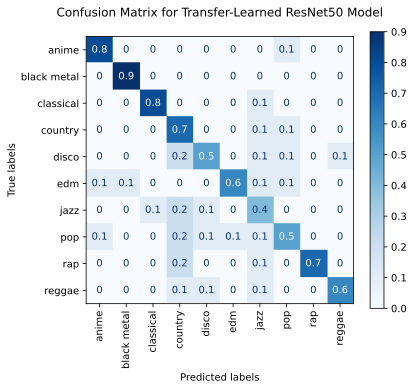

In [35]:
my_plot_confusion_matrix_v2(
    music_df_test['genre'],
    music_df_pred['class_names'],
    class_labels, 'Confusion Matrix for Transfer-Learned ResNet50 Model'
)

### Кластеризация эмбедингов.

Здесь автор берет всю ответственность на себя, и, скорее всего, что-то было посчитано неверно, поскольку на нижнем графике все классы перемешаны, в то время как Confusion Matrix указывает на совершенно обратное. Но зато картинка красочная.

In [36]:
dls: Any = learn.dls.test_dl(music_df_test['full_file_name'])
embeddings: list[Any] = []

for xb in dls:
    output = learn.model[0](xb[0])
    embeddings.append(output[:,:,0,0].squeeze().cpu().detach().numpy())

embeddings = np.concatenate(embeddings)

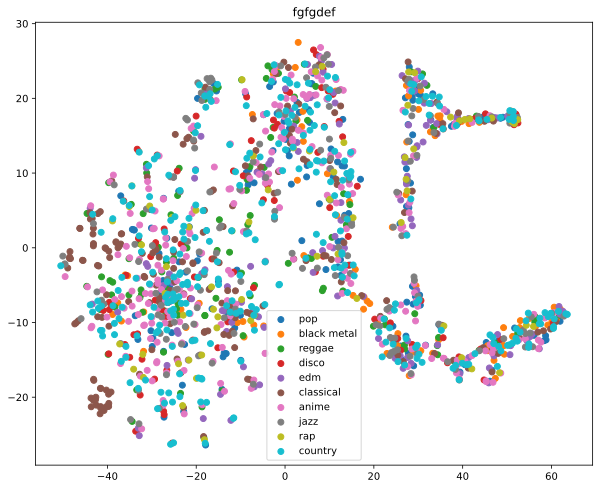

In [37]:
my_plot_embedding(embeddings, music_df_test['genre'], 'fgfgdef')

## Общий вывод и дальнейшие шаги.

Итак, на основании анализа проведенного выше можно сделать следующие выводы:

1. Были использованы различные методы подготовки данных и обучения моделей, включая стратифицированное разбиение данных, технику передачи обучения и оптимизацию learning rate.
2. Наблюдалось значительное улучшение метрик и качества предсказаний по сравнению с базовой моделью.
3. Однако, возможно, не были использованы все доступные методы для улучшения результатов, такие как цветовая обработка изображений.
4. При визуализации результатов возникли некоторые проблемы, включая неправильное представление классов на графиках.
5. Рекомендуется провести более тщательный анализ данных и использовать дополнительные методы обработки изображений для дальнейшего улучшения качества модели.
6. Также важно уделить внимание корректной визуализации результатов, чтобы избежать путаницы и неправильных выводов.

Итак, для дальнейшей работы рекомендуется углубиться в анализ данных, использовать дополнительные методы обработки изображений и улучшить визуализацию результатов.